# PyROOT

In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import ctypes
# To make dataframes 
import pandas as pd
import numpy as np

#import pandas as pd
#import seaborn as sn
#import matplotlib.pyplot as plt
#import numpy as np
#from scipy.optimize import curve_fit
#from scipy.stats import norm

Welcome to JupyROOT 6.31/01


In [2]:
f = ROOT.TFile("AnalysisResults.root") 
t = f.myTask
ROOT.EnableImplicitMT() #Esto activa el multihilo implícito
#df_root = ROOT.RDataFrame('myTask/fEventTree','AnalysisResults.root')
#df_root

In [3]:
fileName = "AnalysisResults.root"
treeName = "myTask/fEventTree"
df_root = ROOT.RDataFrame(treeName, fileName)
df_root

In [9]:
#VO time dataframe 
np_arays_V0 = df_root.AsNumpy(["fV0ATime","fV0CTime","fV0ADecision","fV0CDecision"])
df_pandas_V0 = pd.DataFrame(np_arays_V0)
df_pandas_V0
#df_pandas.to_csv('df_VOTime', index=True) 

,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision
0,10.907308,2.737122,1,1
1,-1024.000000,-1024.000000,0,0
2,-1024.000000,-1024.000000,0,0
3,-1024.000000,-1024.000000,0,0
4,-1024.000000,-1024.000000,0,0
...,...,...,...,...
4736,10.955568,2.731018,1,1
4737,11.854608,3.194482,1,1
4738,11.253976,2.274559,1,1
4739,11.275013,3.088775,1,1


In [10]:
#VO time dataframe 
#np_arays_V0 = df_root.AsNumpy(["fV0ATime","fV0CTime"])
np_arays_V0 = df_root.AsNumpy(["fV0ATime","fV0CTime","fV0ADecision","fV0CDecision"])
df_pandas_V0 = pd.DataFrame(np_arays_V0)
#df_pandas
df_pandas_V0.to_csv('Data/df_V0Time_Decision.csv', index=False) 

In [29]:
#AD time dataframe 
np_arays_AD = df_root.AsNumpy(["fADATime","fADCTime","fADADecision","fADCDecision"])
df_pandas_AD = pd.DataFrame(np_arays_AD)
#df_pandas_AD
df_pandas_AD.to_csv('Data/df_ADTime_Decision.csv', index=False) 

# **Python** 

In [1]:
import pandas as pd
import numpy as np
#Graphs
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sn
from scipy.stats import norm

In [65]:
class MyDataframe:
    def __init__(self):
        self.list1 = []  # Se inicializa la primera lista 
        self.list2 = []  # Se inicializa la segunda lista 

    def add_item(self, item, list_number=1):
        # Agregar elemento a la lista especificada (1 o 2)
        if list_number == 1:
            self.list1.append(item)
        elif list_number == 2:
            self.list2.append(item)
        else:
            raise ValueError("list_number debe ser 1 o 2.")

    def to_dataframe(self):
        # Para asegurar de que ambas listas tengan la misma longitud completando con None donde sea necesario
        max_len = max(len(self.list1), len(self.list2))
        list1_filled = self.list1 + [None] * (max_len - len(self.list1))
        list2_filled = self.list2 + [None] * (max_len - len(self.list2))
        
        # Crear un DataFrame con ambas listas como columnas
        return pd.DataFrame({'Eficiencia': list1_filled, 'Resolucion temporal': list2_filled})
        
# Crear una instancia de MyDataframe
my_two_lists = MyDataframe()


# Usar add_item para agregar valores a cada lista, ejemplo:
#my_two_lists.add_item(valor, list_number=1)
#my_two_lists.add_item(valor, list_number=2)

In [99]:
# Create a DataFrame from the lists
df_EfiTime = my_two_lists.to_dataframe()

# Print the DataFrame
df_EfiTime
#df_EfiTime.to_csv('Data/df_EfiTime.csv', index=False)
#print(df)

,Eficiencia,Resolucion temporal
0,84.288604,0.358672
1,92.515172,0.926078
2,84.288604,0.562385
3,77.950101,0.368883
4,96.369637,0.697815
5,99.009901,1.915067
6,96.369637,0.608408
7,95.379538,0.944777
8,97.706422,0.631462
9,99.541284,2.124348


In [2]:
df_EfiTime_f = pd.read_csv('Data/df_EfiTime.csv')
df_EfiTime_f

,Eficiencia,Resolucion temporal
0,84.288604,0.358672
1,92.515172,0.926078
2,84.288604,0.562385
3,77.950101,0.368883
4,96.369637,0.697815
5,99.009901,1.915067
6,96.369637,0.608408
7,95.379538,0.944777
8,97.706422,0.631462
9,99.541284,2.124348


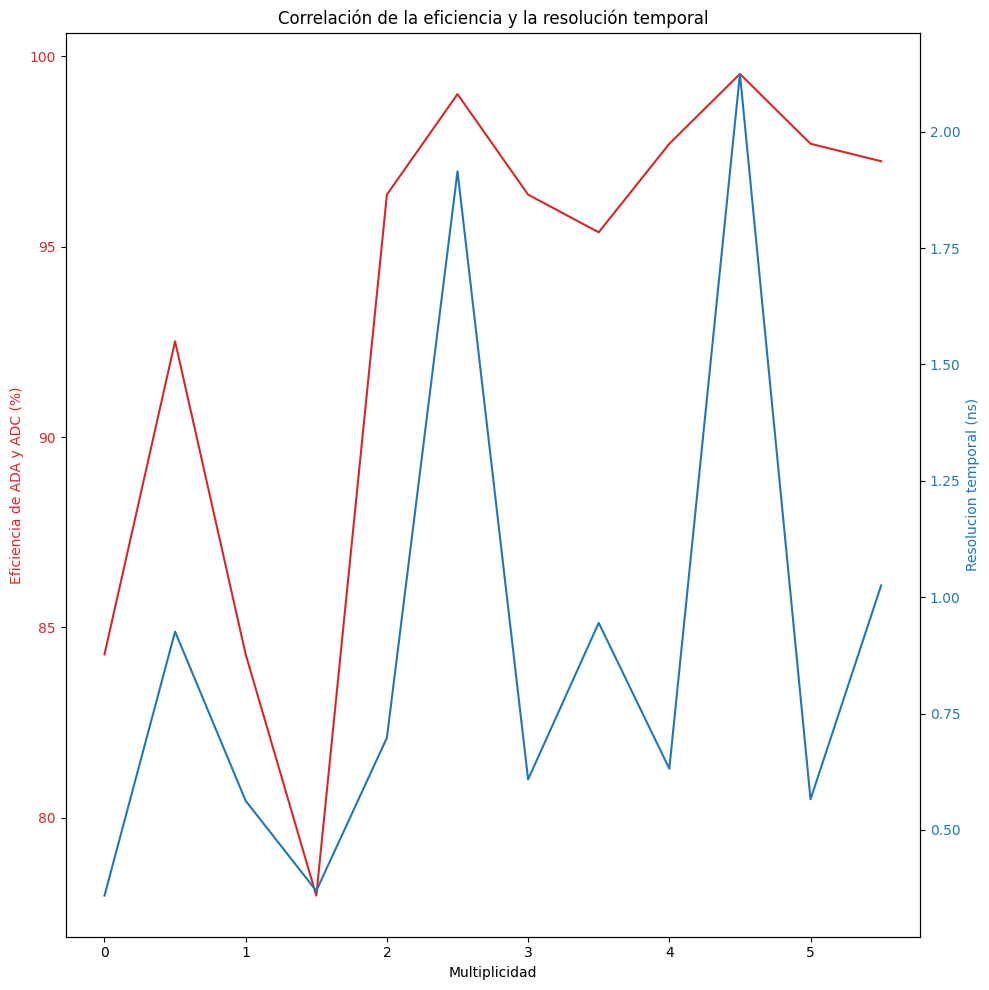

In [3]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 10))

t = np.arange(0, 6, step=0.5)

# Plot data for the first y-axis (e.g., Temperature)
ax1.plot(t, df_EfiTime_f['Eficiencia'], color='tab:red', label='Eficiencia')
ax1.set_xlabel('Multiplicidad')
ax1.set_ylabel('Eficiencia de ADA y ADC (%)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(t, df_EfiTime_f['Resolucion temporal'], color='tab:blue', label='Promedio')
ax2.set_ylabel('Resolucion temporal (ns)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Show the plot
plt.title('Correlación de la eficiencia y la resolución temporal')
fig.tight_layout()  # Adjust layout to prevent label overlap
#fig.savefig("out.png") 
plt.show()


In [5]:
df_ADyV0 = pd.read_csv('Data/df_ADyV0_AC.csv')

In [6]:
df_ADyV0_D = df_ADyV0[(df_ADyV0['fADADecision'] == 1) & (df_ADyV0['fADCDecision'] == 1) & (df_ADyV0['fV0ADecision'] == 1) & (df_ADyV0['fV0CDecision'] == 1)]

In [8]:
df_ADyV0_DV0 = df_ADyV0[(df_ADyV0['fV0ADecision'] == 1) & (df_ADyV0['fV0CDecision'] == 1)]
#df_ADyV0_DV0

# Eficiencia de ADA y ADC

In [14]:
#df_ADyV0_AC = pd.read_csv('Data/df_ADyV0_AC.csv')
#df_Multiplicity = pd.read_csv('Data/df_Multiplicity_mean.csv') 
#df_result = pd.concat([df_ADyV0_AC, df_Multiplicity], axis = 1)

df_result = pd.read_csv('Data/df_V0yAD.csv')

In [15]:
#df_result

In [16]:
#df_result = pd.read_csv('Data/df_V0yAD.csv')
df_result = df_result[  (df_result['fV0ATime']>0) & (df_result['fV0CTime'] >0)] 
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_V0

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD,Time V0,Time AD
19,57.663406,64.801080,1,1,11.632494,2.813223,1,1,1.815065,44.185391,-362.683683,61.250702
20,57.423737,64.552025,1,1,11.012225,2.816604,1,1,2.504929,24.260892,-250.407465,-211.321582
21,56.636350,65.140770,1,1,11.031052,2.882662,1,1,5.476793,257.092520,-154.570460,60.644519
23,56.365710,64.942630,1,1,11.132687,2.724494,1,1,2.006256,186.356222,-266.988295,60.405272
26,56.320442,66.108246,1,1,11.057653,3.883675,1,1,0.793547,2.959661,-604.771055,-278.486984
...,...,...,...,...,...,...,...,...,...,...,...,...
4736,-1024.000000,65.510370,0,1,11.854608,3.194482,1,1,1.557227,183.714995,-606.124788,-479.361217
4737,56.992820,64.960120,1,1,11.253976,2.274559,1,1,0.961132,30.909000,-461.136596,60.834987
4738,57.766415,65.219330,1,1,11.275013,3.088775,1,1,0.986727,48.161476,-621.130441,61.429167
4739,56.727490,65.166466,1,1,10.848169,2.735008,1,1,5.951024,296.364777,-9.253727,60.618392


In [17]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_ADC = df_result_V0[(df_result_V0['fADCDecision'] == 1)]
#df_result_ADC
efi_ADC = (df_result_ADC['fADCDecision'] == 1).sum()
print(efi_ADC)

2248


In [8]:
df_result_ADA = df_result[(df_result['fADADecision'] == 1)]
#df_result_ADA

### Eficiencia de cada lado de AD

In [9]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_ADA = df_result_V0[(df_result_V0['fADADecision'] == 1)]

efi_ADA = (df_result_ADA ['fADADecision'] == 1).sum()
efi_V0A = (df_result_V0 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0 ['fV0CDecision'] == 1).sum()

print("#Even_ADA:", efi_ADA, "#Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("Eficiencia ADA: ", (efi_ADA/(efi_V0A))*100,"%")

#Even_ADA: 2105 #Even_V0A: 2366 #Even_V0C: 2366
Eficiencia ADA:  88.9687235841082 %


In [10]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_ADC = df_result_V0[(df_result_V0['fADCDecision'] == 1)]

efi_ADC = (df_result_ADC['fADCDecision'] == 1).sum()
efi_V0A = (df_result_V0 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0 ['fV0CDecision'] == 1).sum()

print("#Even_ADC:", efi_ADC, "#Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("Eficiencia ADA: ", (efi_ADC/(efi_V0A))*100, "%")

#Even_ADC: 2248 #Even_V0A: 2366 #Even_V0C: 2366
Eficiencia ADA:  95.01267962806425 %


### Eficiencia global

In [63]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_AD_AC = df_result_V0[(df_result_V0['fADADecision'] == 1) | (df_result_V0['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC ['fADADecision'] == 1).sum()

efi_V0A = (df_result_V0 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0 ['fV0CDecision'] == 1).sum()

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", (efi_ADA/(efi_V0A))*100,"%")

#Even_ADA: 2105 #Even_ADC: 2105   #Even_V0A: 2366 #Even_V0C: 2366
ε_1:  88.9687235841082 %


In [53]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_AD_AC = df_result_V0[(df_result_V0['fADADecision'] == 1) & (df_result_V0['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC ['fADADecision'] == 1).sum()

efi_V0A = (df_result_V0 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0 ['fV0CDecision'] == 1).sum()

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_2: ", (efi_ADA/(efi_V0A))*100,"%")

#Even_ADA: 2004 #Even_ADC: 2004   #Even_V0A: 2366 #Even_V0C: 2366
ε_2:  84.69991546914623 %


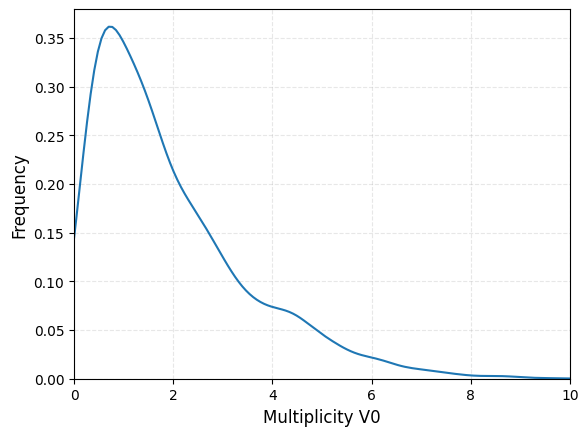

In [17]:
#V0
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
sn.kdeplot(data = df_result_V0["Multiplicity V0"])
plt.xlim([0,10])  
plt.xlabel("Multiplicity V0", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

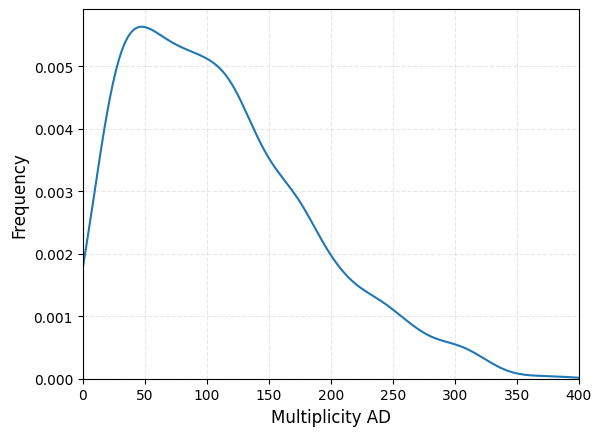

In [18]:
#AD
df_result_AD = df_result[(df_result['fADADecision'] == 1) & (df_result['fADCDecision'] == 1)]
sn.kdeplot(data = df_result_AD["Multiplicity AD"])
plt.xlim([0,400])  
plt.xlabel("Multiplicity AD", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

In [14]:
#df_result_AD

### Eficiencia por rangos de multiplicidad en V0

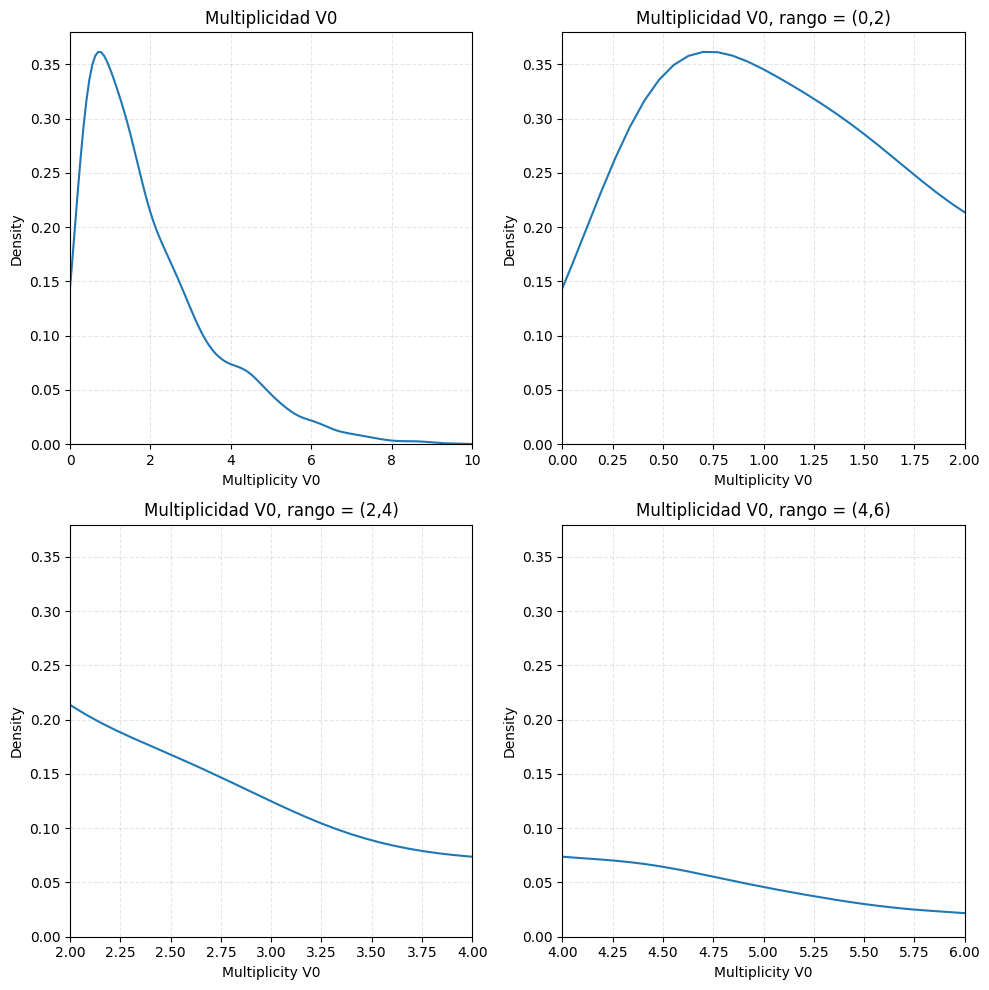

In [30]:
# Create a figure with 1 row and 4 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))


sn.kdeplot(data = df_result_V0["Multiplicity V0"], ax=axes[0,0])
axes[0,0].set_xlim(0, 10)
axes[0,0].grid(True, alpha=0.3, linestyle="--") 
axes[0,0].set_title('Multiplicidad V0')

sn.kdeplot(data = df_result_V0["Multiplicity V0"], ax=axes[0,1])
axes[0,1].set_xlim(0, 2)
axes[0,1].grid(True, alpha=0.3, linestyle="--") 
axes[0,1].set_title('Multiplicidad V0, rango = (0,2)')

sn.kdeplot(data = df_result_V0["Multiplicity V0"], ax=axes[1,0])
axes[1,0].set_xlim(2, 4)
axes[1,0].grid(True, alpha=0.3, linestyle="--") 
axes[1,0].set_title('Multiplicidad V0, rango = (2,4)')

sn.kdeplot(data = df_result_V0["Multiplicity V0"], ax=axes[1,1])
axes[1,1].set_xlim(4, 6)
axes[1,1].grid(True, alpha=0.3, linestyle="--") 
axes[1,1].set_title('Multiplicidad V0, rango = (4,6)')

plt.tight_layout()
plt.show()

In [ ]:
#Determinación de rangos de multiplicidad
#V0
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
sn.kdeplot(data = df_result_V0["Multiplicity V0"])
plt.xlim([4,6])  
plt.xlabel("Multiplicity V0", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

In [33]:
#df_ADyV0 = pd.read_csv('Data/df_ADyV0_AC.csv')
#df_Multiplicity = pd.read_csv('Data/df_MultiplicityV0_mean.csv') 
#df_result = pd.concat([df_ADyV0, df_Multiplicity], axis = 1)
df_ADyV0 = pd.read_csv('Data/df_V0yAD.csv')
df_result = df_ADyV0[  (df_ADyV0['fV0ATime']>0) & (df_ADyV0['fV0CTime'] >0)] 
df_result = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD,Time V0,Time AD
19,57.663406,64.801080,1,1,11.632494,2.813223,1,1,1.815065,44.185391,-362.683683,61.250702
20,57.423737,64.552025,1,1,11.012225,2.816604,1,1,2.504929,24.260892,-250.407465,-211.321582
21,56.636350,65.140770,1,1,11.031052,2.882662,1,1,5.476793,257.092520,-154.570460,60.644519
23,56.365710,64.942630,1,1,11.132687,2.724494,1,1,2.006256,186.356222,-266.988295,60.405272
26,56.320442,66.108246,1,1,11.057653,3.883675,1,1,0.793547,2.959661,-604.771055,-278.486984
...,...,...,...,...,...,...,...,...,...,...,...,...
4736,-1024.000000,65.510370,0,1,11.854608,3.194482,1,1,1.557227,183.714995,-606.124788,-479.361217
4737,56.992820,64.960120,1,1,11.253976,2.274559,1,1,0.961132,30.909000,-461.136596,60.834987
4738,57.766415,65.219330,1,1,11.275013,3.088775,1,1,0.986727,48.161476,-621.130441,61.429167
4739,56.727490,65.166466,1,1,10.848169,2.735008,1,1,5.951024,296.364777,-9.253727,60.618392


#### Rango (0,2)

In [30]:
df_result_V0_1 = df_result[(df_result['Multiplicity V0'] > 0) & (df_result['Multiplicity V0'] < 2)]
#df_result_V0_1

##### _Eficiencia de cada lado de AD_

_ADA_

In [24]:
df_result_V0_1 = df_result_V0_1[(df_result_V0_1['fV0ADecision'] == 1) & (df_result_V0_1['fV0CDecision'] == 1)]
df_result_ADA_1 = df_result_V0_1[(df_result_V0_1['fADADecision'] == 1)]

efi_ADA_1 = (df_result_ADA_1 ['fADADecision'] == 1).sum()
efi_V0A_1 = (df_result_V0_1 ['fV0ADecision'] == 1).sum()
efi_V0C_1 = (df_result_V0_1 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA_1/(efi_V0A_1))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADA:", efi_ADA_1, "#Even_V0A:", efi_V0A_1, "#Even_V0C:", efi_V0C_1)
print("Eficiencia ADA: ", Efi ,"%")

#Even_ADA: 1250 #Even_V0A: 1483 #Even_V0C: 1483
Eficiencia ADA:  84.28860418071477 %


_ADC_

In [72]:
df_result_V0_1 = df_result_V0_1[(df_result_V0_1['fV0ADecision'] == 1) & (df_result_V0_1['fV0CDecision'] == 1)]
df_result_ADC_1 = df_result_V0_1[(df_result_V0_1['fADCDecision'] == 1)]

efi_ADC_1 = (df_result_ADC_1 ['fADCDecision'] == 1).sum()
efi_V0A_1 = (df_result_V0_1 ['fV0ADecision'] == 1).sum()
efi_V0C_1 = (df_result_V0_1 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADC_1/(efi_V0C_1))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADC:", efi_ADC_1, "#Even_V0A:", efi_V0A_1, "#Even_V0C:", efi_V0C_1)
print("Eficiencia ADC: ", Efi,"%")

#Even_ADC: 1372 #Even_V0A: 1483 #Even_V0C: 1483
Eficiencia ADC:  92.51517194875252 %


##### _Eficiencia global_

_or_

In [73]:
df_result_V0_1 = df_result_V0_1[(df_result_V0_1['fV0ADecision'] == 1) & (df_result_V0_1['fV0CDecision'] == 1)]
df_result_AD_AC_1 = df_result_V0_1[(df_result_V0_1['fADADecision'] == 1) | (df_result_V0_1['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_1 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_1 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_1 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_1 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", Efi,"%")

#Even_ADA: 1250 #Even_ADC: 1372   #Even_V0A: 1483 #Even_V0C: 1483
ε_1:  84.28860418071477 %


_and_

In [74]:
df_result_V0_1 = df_result_V0_1[(df_result_V0_1['fV0ADecision'] == 1) & (df_result_V0_1['fV0CDecision'] == 1)]
df_result_AD_AC_1 = df_result_V0_1[(df_result_V0_1['fADADecision'] == 1) & (df_result_V0_1['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_1 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_1 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_1 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_1 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_2: ", Efi,"%")

#Even_ADA: 1156 #Even_ADC: 1156   #Even_V0A: 1483 #Even_V0C: 1483
ε_2:  77.95010114632501 %


#### Rango (2,4)

In [75]:
df_result_V0_2 = df_result[(df_result['Multiplicity V0'] > 2) & (df_result['Multiplicity V0'] < 4)]
df_result_V0_2

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD
20,57.423737,64.552025,1,1,11.012225,2.816604,1,1,2.504929,24.260892
23,56.365710,64.942630,1,1,11.132687,2.724494,1,1,2.006256,186.356222
34,56.661556,64.987885,1,1,10.737239,2.780025,1,1,2.390918,160.401179
39,57.543780,65.113770,1,1,11.215122,2.918830,1,1,2.471574,107.416811
41,56.597786,65.787280,1,1,11.111274,3.379383,1,1,2.823973,184.607215
...,...,...,...,...,...,...,...,...,...,...
4674,56.809383,65.350040,1,1,11.062545,2.887761,1,1,2.272302,173.907840
4681,56.989330,65.250070,1,1,11.192534,2.929575,1,1,2.992609,150.424707
4689,56.851814,64.840330,1,1,11.056722,2.992817,1,1,2.416748,183.238887
4707,57.121502,65.121610,1,1,11.565313,2.966977,1,1,2.134165,165.662673


##### _Eficiencia de cada lado de AD_

_ADA_

In [76]:
df_result_V0_2 = df_result_V0_2[(df_result_V0_2['fV0ADecision'] == 1) & (df_result_V0_2['fV0CDecision'] == 1)]
df_result_ADA_2 = df_result_V0_2[(df_result_V0_2['fADADecision'] == 1)]

efi_ADA_2 = (df_result_ADA_2 ['fADADecision'] == 1).sum()
efi_V0A_2 = (df_result_V0_2 ['fV0ADecision'] == 1).sum()
efi_V0C_2 = (df_result_V0_2 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA_2/(efi_V0A_2))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADA:", efi_ADA_2, "#Even_V0A:", efi_V0A_2, "#Even_V0C:", efi_V0C_2)
print("Eficiencia ADA: ", Efi,"%")

#Even_ADA: 584 #Even_V0A: 606 #Even_V0C: 606
Eficiencia ADA:  96.36963696369637 %


_ADC_

In [77]:
df_result_V0_2 = df_result_V0_2[(df_result_V0_2['fV0ADecision'] == 1) & (df_result_V0_2['fV0CDecision'] == 1)]
df_result_ADC_2 = df_result_V0_2[(df_result_V0_2['fADCDecision'] == 1)]

efi_ADC_2 = (df_result_ADC_2 ['fADCDecision'] == 1).sum()
efi_V0A_2 = (df_result_V0_2 ['fV0ADecision'] == 1).sum()
efi_V0C_2 = (df_result_V0_2 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADC_2/(efi_V0C_2))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADC:", efi_ADC_2, "#Even_V0A:", efi_V0A_2, "#Even_V0C:", efi_V0C_2)
print("Eficiencia ADC: ", Efi,"%")

#Even_ADC: 600 #Even_V0A: 606 #Even_V0C: 606
Eficiencia ADC:  99.00990099009901 %


##### _Eficiencia global_

_or_

In [78]:
df_result_V0_2 = df_result_V0_2[(df_result_V0_2['fV0ADecision'] == 1) & (df_result_V0_2['fV0CDecision'] == 1)]
df_result_AD_AC_2 = df_result_V0_2[(df_result_V0_2['fADADecision'] == 1) | (df_result_V0_2['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_2 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_2 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_2 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_2 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", Efi,"%")

#Even_ADA: 584 #Even_ADC: 600   #Even_V0A: 606 #Even_V0C: 606
ε_1:  96.36963696369637 %


_and_

In [79]:
df_result_V0_2 = df_result_V0_2[(df_result_V0_2['fV0ADecision'] == 1) & (df_result_V0_2['fV0CDecision'] == 1)]
df_result_AD_AC_2 = df_result_V0_2[(df_result_V0_2['fADADecision'] == 1) & (df_result_V0_2['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_2 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_2 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_2 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_2 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_2: ", Efi,"%")

#Even_ADA: 578 #Even_ADC: 578   #Even_V0A: 606 #Even_V0C: 606
ε_2:  95.37953795379538 %


#### Rango (4,6)

In [80]:
df_result_V0_3 = df_result[(df_result['Multiplicity V0'] > 4) & (df_result['Multiplicity V0'] < 6)]
df_result_V0_3

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD
21,56.636350,65.140770,1,1,11.031052,2.882662,1,1,5.476793,257.092520
28,56.620605,65.064186,1,1,11.013649,2.703893,1,1,4.240585,187.834372
65,57.264910,64.620760,1,1,11.277000,2.617904,1,1,4.512083,135.823838
80,56.581020,65.095726,1,1,11.017580,2.968967,1,1,5.528775,72.146759
98,56.655697,65.036640,1,1,10.977918,2.885402,1,1,5.000338,118.884368
...,...,...,...,...,...,...,...,...,...,...
4534,57.306076,65.486250,1,1,11.497868,3.280368,1,1,4.375262,385.562498
4603,57.437800,65.256195,1,1,10.998308,3.064978,1,1,4.383897,99.265797
4640,57.108173,65.009960,1,1,11.042643,3.013885,1,1,4.586314,165.004746
4721,57.412956,65.496480,1,1,11.605885,3.359952,1,1,4.750001,193.465500


##### _Eficiencia de cada lado de AD_

_ADA_

In [81]:
df_result_V0_3 = df_result_V0_3[(df_result_V0_3['fV0ADecision'] == 1) & (df_result_V0_3['fV0CDecision'] == 1)]
df_result_ADA_3 = df_result_V0_3[(df_result_V0_3['fADADecision'] == 1)]

efi_ADA_3 = (df_result_ADA_3 ['fADADecision'] == 1).sum()
efi_V0A_3 = (df_result_V0_3 ['fV0ADecision'] == 1).sum()
efi_V0C_3 = (df_result_V0_3 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA_3/(efi_V0A_3))*100 
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADA:", efi_ADA_3, "#Even_V0A:", efi_V0A_3, "#Even_V0C:", efi_V0C_3)
print("Eficiencia ADA: ", Efi,"%")

#Even_ADA: 213 #Even_V0A: 218 #Even_V0C: 218
Eficiencia ADA:  97.70642201834863 %


_ADC_

In [82]:
df_result_V0_3 = df_result_V0_3[(df_result_V0_3['fV0ADecision'] == 1) & (df_result_V0_3['fV0CDecision'] == 1)]
df_result_ADC_3 = df_result_V0_3[(df_result_V0_3['fADCDecision'] == 1)]

efi_ADC_3 = (df_result_ADC_3 ['fADCDecision'] == 1).sum()
efi_V0A_3 = (df_result_V0_3 ['fV0ADecision'] == 1).sum()
efi_V0C_3 = (df_result_V0_3 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADC_3/(efi_V0C_3))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADC:", efi_ADC_3, "#Even_V0A:", efi_V0A_3, "#Even_V0C:", efi_V0C_3)
print("Eficiencia ADA: ", Efi,"%")

#Even_ADA: 217 #Even_V0A: 218 #Even_V0C: 218
Eficiencia ADA:  99.54128440366972 %


##### _Eficiencia global_

_or_

In [83]:
df_result_V0_3 = df_result_V0_3[(df_result_V0_3['fV0ADecision'] == 1) & (df_result_V0_3['fV0CDecision'] == 1)]
df_result_AD_AC_3 = df_result_V0_3[(df_result_V0_3['fADADecision'] == 1) | (df_result_V0_3['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_3 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_3 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_3 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_3 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", Efi,"%")

#Even_ADA: 213 #Even_ADC: 217   #Even_V0A: 218 #Even_V0C: 218
ε_1:  97.70642201834863 %


_and_

In [84]:
df_result_V0_3 = df_result_V0_3[(df_result_V0_3['fV0ADecision'] == 1) & (df_result_V0_3['fV0CDecision'] == 1)]
df_result_AD_AC_3 = df_result_V0_3[(df_result_V0_3['fADADecision'] == 1) & (df_result_V0_3['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_3 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_3 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_3 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_3 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) #

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", Efi,"%")

#Even_ADA: 212 #Even_ADC: 212   #Even_V0A: 218 #Even_V0C: 218
ε_1:  97.24770642201835 %


# Multiplicidad 

### Multiplicidad AD

In [3]:
df_multyAD = pd.read_csv('Data/df_fADMultiplicity.csv')
df_multyAD

,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,val_15
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,95.428749,631.705261,504.596619,179.865051,98.208382,724.340576,579.099060,126.000748,0.065015,0.000000,0.000000,0.000000,0.062912,0.000000,0.000000,0.067548
4737,7.381680,71.564377,68.670906,34.292805,10.140119,106.252670,72.815758,44.079178,12.546410,11.600514,8.453848,8.404945,13.363747,9.995365,8.419801,6.561876
4738,48.084087,122.988983,66.435234,82.957825,78.756248,198.158051,45.000187,90.597801,5.910863,1.737499,3.222664,3.612874,4.090411,5.114799,8.369161,5.546924
4739,344.101318,784.173157,537.421143,422.010712,486.275879,887.740784,437.219696,375.971497,56.113125,56.295235,83.374825,39.811962,64.000198,43.599831,80.314995,43.412075


In [4]:
df_multyAD["Suma"] = df_multyAD.iloc[:, :].sum(axis = 1)
df_multyAD["Promedio"] = df_multyAD.iloc[:, :].mean(axis = 1)
df_multyAD

,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,val_15,Suma,Promedio
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,95.428749,631.705261,504.596619,179.865051,98.208382,724.340576,579.099060,126.000748,0.065015,0.000000,0.000000,0.000000,0.062912,0.000000,0.000000,0.067548,2939.439920,345.816461
4737,7.381680,71.564377,68.670906,34.292805,10.140119,106.252670,72.815758,44.079178,12.546410,11.600514,8.453848,8.404945,13.363747,9.995365,8.419801,6.561876,494.543999,58.181647
4738,48.084087,122.988983,66.435234,82.957825,78.756248,198.158051,45.000187,90.597801,5.910863,1.737499,3.222664,3.612874,4.090411,5.114799,8.369161,5.546924,770.583611,90.656895
4739,344.101318,784.173157,537.421143,422.010712,486.275879,887.740784,437.219696,375.971497,56.113125,56.295235,83.374825,39.811962,64.000198,43.599831,80.314995,43.412075,4741.836430,557.863109


In [23]:
#plt.hist(df_multyAD['Suma'],bins=20)
#plt.hist(df_multyAD['Promedio'],bins=50)

array([[<Axes: title={'center': 'val_0'}>,
        <Axes: title={'center': 'val_1'}>,
        <Axes: title={'center': 'val_2'}>,
        <Axes: title={'center': 'val_3'}>],
       [<Axes: title={'center': 'val_4'}>,
        <Axes: title={'center': 'val_5'}>,
        <Axes: title={'center': 'val_6'}>,
        <Axes: title={'center': 'val_7'}>],
       [<Axes: title={'center': 'val_8'}>,
        <Axes: title={'center': 'val_9'}>,
        <Axes: title={'center': 'val_10'}>,
        <Axes: title={'center': 'val_11'}>],
       [<Axes: title={'center': 'val_12'}>,
        <Axes: title={'center': 'val_13'}>,
        <Axes: title={'center': 'val_14'}>,
        <Axes: title={'center': 'val_15'}>],
       [<Axes: title={'center': 'Suma'}>,
        <Axes: title={'center': 'Promedio'}>, <Axes: >, <Axes: >]],
      dtype=object)

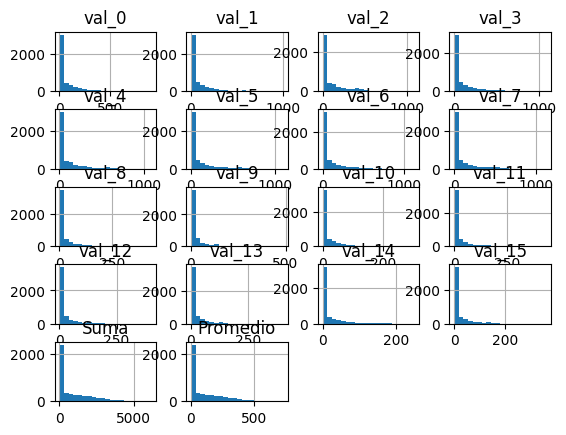

In [13]:
df_multyAD.hist(bins=20)

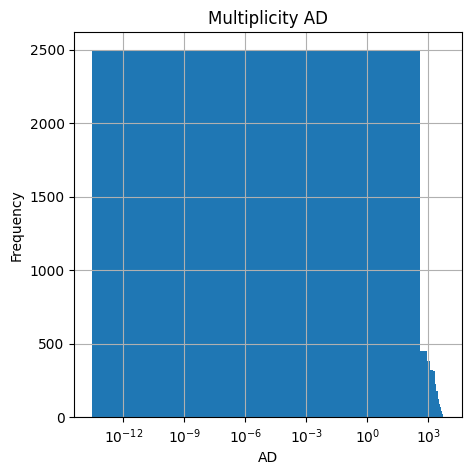

In [140]:
# Plotting Histogram for the 'Length' column 
plt.figure(figsize=(5, 5))
hist = df_multyAD['Suma'].hist(bins=15) 
plt.xscale('log')  
# Adding title and labels 
plt.title('Multiplicity AD') 
plt.xlabel('AD') 
plt.ylabel('Frequency') 

#plt.savefig('Resultados/TH1D_Multiplicity_AD.png')
# Display the histogram 
plt.show() 


In [16]:
df_multy = pd.read_csv('Data/df_fADMultiplicity.csv')
multy_array= df_multy.to_numpy().reshape(-1,1)
multy_array

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.06754753]])

In [17]:
multy_array.shape

(75856, 1)

In [18]:
df_time = pd.read_csv('Data/df_fADTime.csv')
time_array= df_time.to_numpy().reshape(-1,1)
time_array

array([[-1024.],
       [-1024.],
       [-1024.],
       ...,
       [-1024.],
       [-1024.],
       [-1024.]])

In [19]:
time_array.shape

(75856, 1)

In [20]:
new_df  =pd.DataFrame()
new_df['multy'] =pd.DataFrame(multy_array)
new_df['time'] =pd.DataFrame(time_array)
new_df = new_df[new_df['time'] >0]
#new_df

,multy,time
304,9.278383,65.244522
305,2.779991,65.042465
306,159.738968,64.807777
307,55.312496,64.972237
308,13.327127,65.222801
...,...,...
75843,88.565315,65.663071
75844,133.724319,65.453445
75845,119.021439,64.903114
75846,44.800072,65.298203


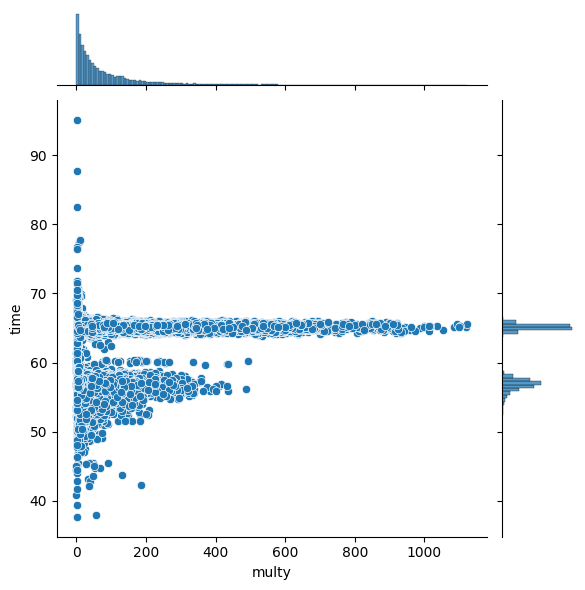

In [21]:
sn.jointplot(x= 'multy'  ,
             y= 'time' ,
             data=new_df)
#.savefig('AD_Multy_vs_Time.png')

<Axes: >

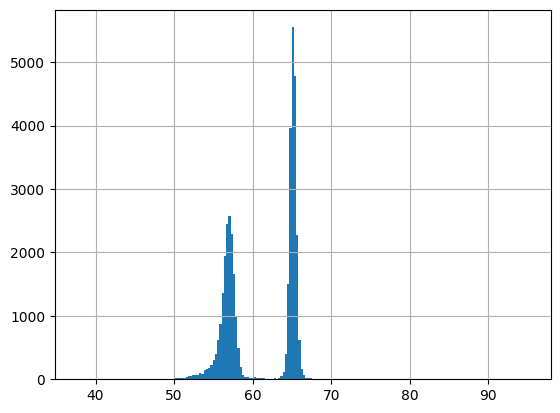

In [22]:
new_df['time'].hist(bins=200)

### Multiplicidad V0

In [23]:
df_multyV0 = pd.read_csv('Data/df_fV0Multiplicity.csv')
#df_multyV0

In [24]:
df_multyV0["Suma"] = df_multyV0.iloc[:, :].sum(axis = 1)
df_multyV0["Promedio"] = df_multyV0.iloc[:, :].mean(axis = 1) #es lo que se usará
#df_multyV0

In [19]:
# Plotting Histogram for the 'Length' column 
#plt.figure(figsize=(5, 5))
#hist = df_multyV0['Suma'].hist(bins=20) 
#plt.xscale('log')
  
# Adding title and labels 
#plt.title('Multiplicity V0') 
#plt.xlabel('V0') 
#plt.ylabel('Frequency') 

#plt.savefig('Resultados/TH1D_Multiplicity_V0.png')
# Display the histogram 
#plt.show() 

Text(0.5, 1.0, 'MultiplicityV0 vs MultiplicityAD')

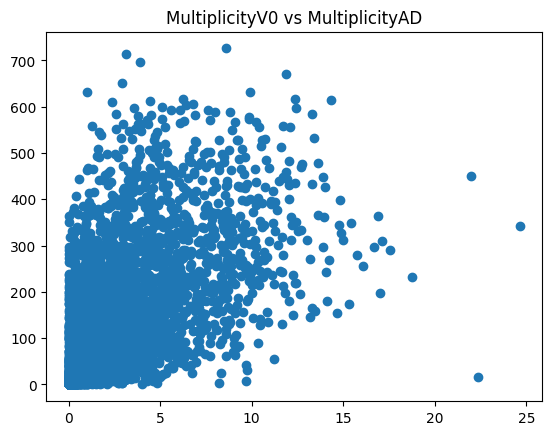

In [22]:
plt.plot(df_multyV0["Promedio"], df_multyAD["Promedio"], 'o' )
plt.title('MultiplicityV0 vs MultiplicityAD')

In [52]:
df_multyV0 = pd.read_csv('Data/df_fV0Multiplicity.csv')
#df_multyAD = pd.read_csv('Data/df_fADMultiplicity.csv')
df_multyV0["Promedio"] = df_multyV0.iloc[:, :].mean(axis = 1)
df_multyAD["Promedio"] = df_multyAD.iloc[:, :].mean(axis = 1)

df_Multiplicity  =pd.DataFrame()

#new_df['multy'] =pd.DataFrame(multy_array)
#new_df['time'] =pd.DataFrame(time_array)
df_Multiplicity['Multiplicity V0'] = df_multyV0[['Promedio']].copy()
df_Multiplicity['Multiplicity AD'] = df_multyAD[['Promedio']].copy()
#df_Multiplicity.to_csv('Data/df_MultiplicityV0_mean.csv', index=False)
df_Multiplicity

,Multiplicity V0,Multiplicity AD
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
4736,1.557227,183.714995
4737,0.961132,30.909000
4738,0.986727,48.161476
4739,5.951024,296.364777


In [18]:
df_Multiplicity = pd.read_csv('Data/df_Multiplicity_mean.csv')
#df_Multiplicity

In [29]:
df_multyV0 = pd.read_csv('Data/df_fV0Multiplicity.csv')
df_multyAD = pd.read_csv('Data/df_fADMultiplicity.csv')
#df_multyV0["Suma"] = df_multyV0.iloc[:, :].sum(axis = 1)
df_multyV0["Promedio"] = df_multyV0.iloc[:, :].mean(axis = 1)
df_multyAD["Promedio"] = df_multyAD.iloc[:, :].mean(axis = 1)

df_Multiplicity  =pd.DataFrame()

#new_df['multy'] =pd.DataFrame(multy_array)
#new_df['time'] =pd.DataFrame(time_array)

df_Multiplicity['Multiplicity V0'] = df_multyV0[['Promedio']].copy()
df_Multiplicity['Multiplicity AD'] = df_multyAD[['Promedio']].copy()

#df_Multiplicity.to_csv('Data/df_Multiplicity_mean.csv', index=False)

In [ ]:
df_Multiplicity

In [86]:
df_Multiplicity_f = df_Multiplicity[(df_Multiplicity['Multiplicity V0'] > 0) & (df_Multiplicity['Multiplicity AD'] > 0)]
#df_Multiplicity_f

,Multiplicity V0,Multiplicity AD
19,116.164190,706.966250
20,160.315454,388.174272
21,350.514748,4113.480314
22,0.740641,0.742865
23,128.400397,2981.699555
...,...,...
4736,99.662499,2939.439920
4737,61.512474,494.543999
4738,63.150544,770.583611
4739,380.865531,4741.836430


In [180]:
new_df_1 = new_df[ (new_df['Multiplicity V0'] > 0) & (new_df['Multiplicity AD'] > 0) & (new_df['Multiplicity V0'] < 1000) & (new_df['Multiplicity AD'] < 1000) ]
new_df_1

,Multiplicity V0,Multiplicity AD
19,116.164190,706.966250
20,160.315454,388.174272
22,0.740641,0.742865
24,0.059948,1.846673
25,0.234258,1.254020
...,...,...
4731,0.926430,1.222105
4733,0.374640,1.059262
4737,61.512474,494.543999
4738,63.150544,770.583611


In [21]:
df_ADyV0 = pd.read_csv('Data/df_ADyV0_AC.csv')

In [22]:
result = pd.concat([df_ADyV0, df_Multiplicity], axis=1)
result

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD
0,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
1,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
2,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
3,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
4,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
4736,-1024.000000,65.510370,0,1,11.854608,3.194482,1,1,1.557227,183.714995
4737,56.992820,64.960120,1,1,11.253976,2.274559,1,1,0.961132,30.909000
4738,57.766415,65.219330,1,1,11.275013,3.088775,1,1,0.986727,48.161476
4739,56.727490,65.166466,1,1,10.848169,2.735008,1,1,5.951024,296.364777


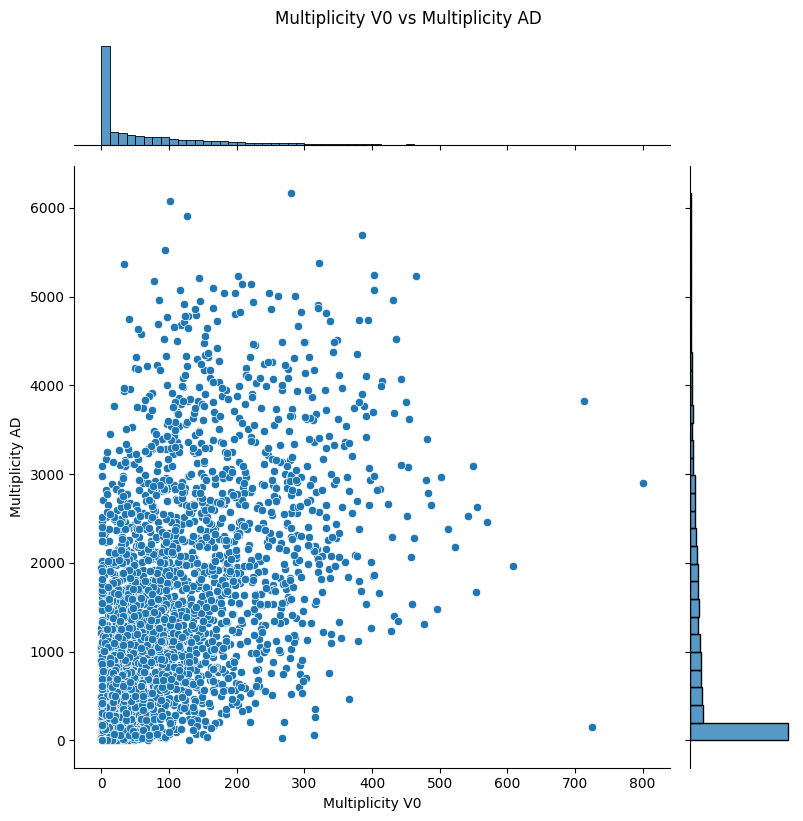

In [78]:
joint_plot = sn.jointplot(x= 'Multiplicity V0'  ,
             y= 'Multiplicity AD' ,
             data=new_df, height=8)
# Adding the title using plt.suptitle()
plt.suptitle('Multiplicity V0 vs Multiplicity AD', y=1.02)
#joint_plot.savefig("Resultados/Multiplicity_V0_AD.png")
plt.show()

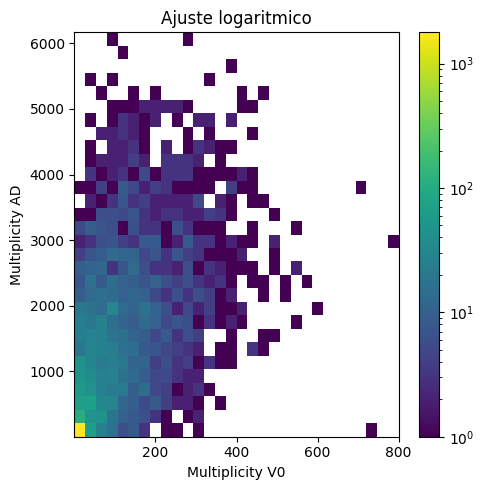

In [133]:
#fig, ax = plt.subplots(tight_layout=True)
fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)
plt.hist2d( new_df['Multiplicity V0'] , new_df['Multiplicity AD'] , bins=(30,30), cmap='viridis', norm=colors.LogNorm()) 
plt.title('Ajuste logaritmico') 
plt.xlabel('Multiplicity V0') 
plt.ylabel('Multiplicity AD')
#plt.hist2d( new_df['Multiplicity V0'] , new_df['Multiplicity AD'] ) 
plt.colorbar() 
#plt.savefig('Resultados/TH2D_Multiplicity.png')

# Tiempo 

### Tiempo AD y V0

##### Análisis V0 Time sin filtrar

In [5]:
#plt.figure(figsize = (10,10))
#sn.heatmap(df_V0yAD.corr(), annot = True, cmap = 'coolwarm')

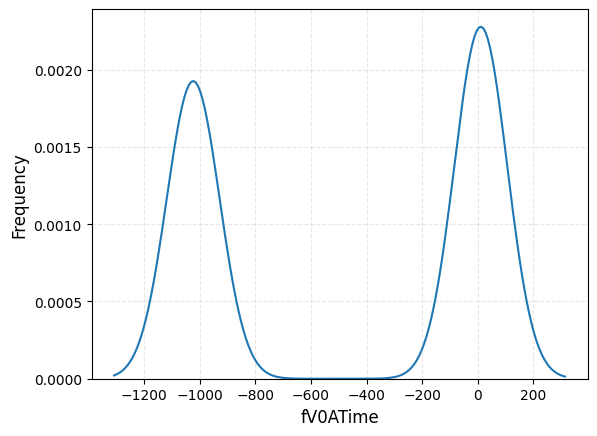

In [8]:
sn.kdeplot(data = df_V0yAD['fV0ATime'])
#plt.xlim([100,70])  
plt.xlabel("fV0ATime", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

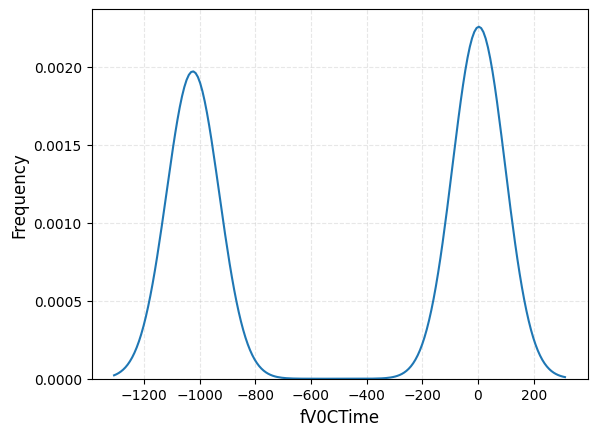

In [9]:
sn.kdeplot(data = df_V0yAD['fV0CTime'])#.get_figure()#.savefig('ADATime_ADCTimeDis1.png')
#plt.xlim([70,70])  
plt.xlabel("fV0CTime", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

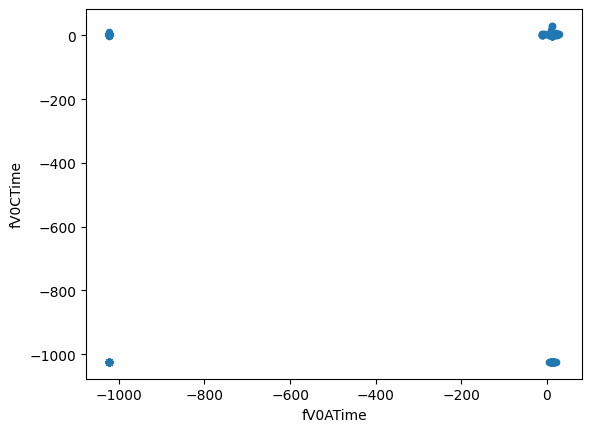

In [10]:
ax1 = df_V0yAD.plot.scatter(x='fV0ATime', y='fV0CTime')#.get_figure()#.savefig('V0ATime_VOCTime.png')

In [7]:
#Seccionando las cuatro partes donde se concentran las datos 
df_V0Time = pd.read_csv('Data/df_V0yAD.csv')
df_V0Time_rup = df_V0Time[  (df_V0Time['fV0ATime']>0) & (df_V0Time['fV0CTime'] >0)] 
df_V0Time_lup = df_V0Time[  (df_V0Time['fV0ATime']<-900) & (df_V0Time['fV0CTime'] >-100)] 
df_V0Time_rdown = df_V0Time[  (df_V0Time['fV0ATime']>-100) & (df_V0Time['fV0CTime'] <-900)] 
df_V0Time_ldown = df_V0Time[  (df_V0Time['fV0ATime']<-900) & (df_V0Time['fV0CTime'] <-900)] 

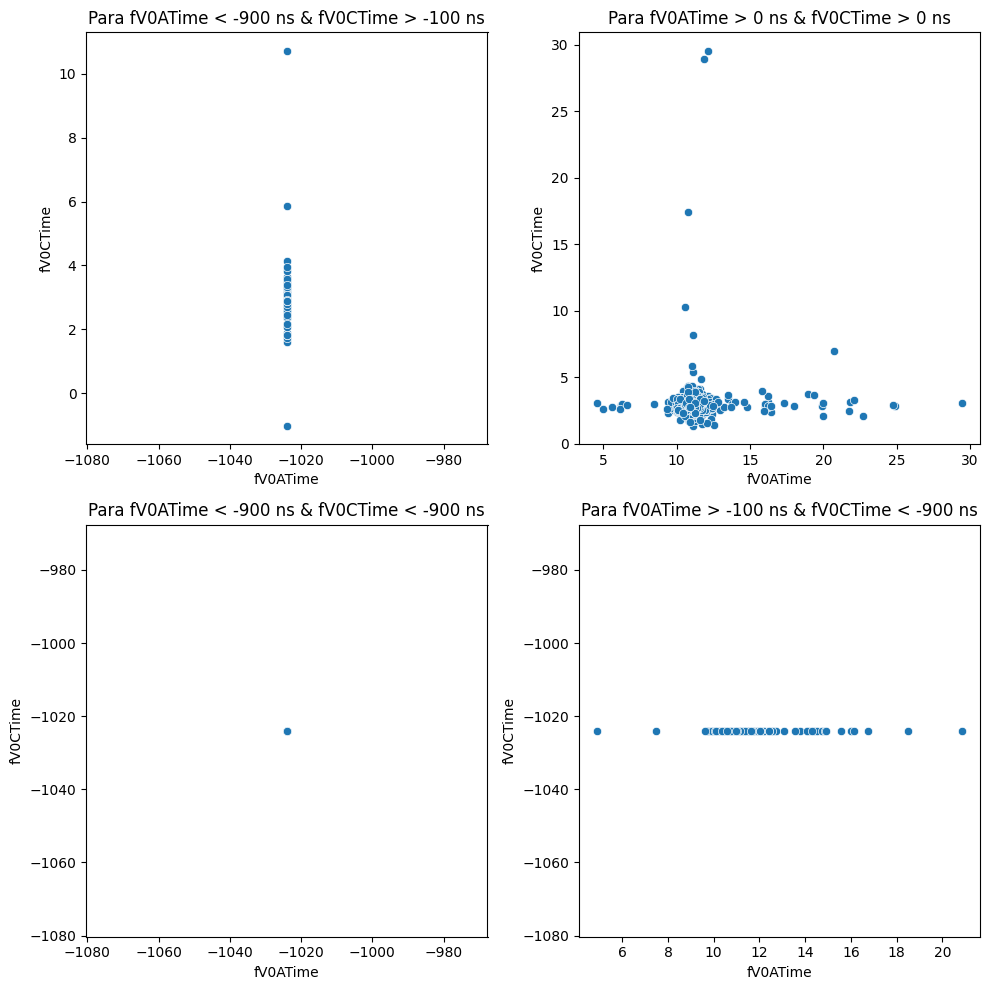

In [12]:
# Crear una figura con 1 fila y 4 columnas
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Trazar la primera gráfica
sn.scatterplot(data=df_V0Time_lup, x='fV0ATime', y='fV0CTime', ax=axes[0,0])
axes[0,0].set_title('Para fV0ATime < -900 ns & fV0CTime > -100 ns')

# Trazar la segunda gráfica
sn.scatterplot(data=df_V0Time_rup, x='fV0ATime', y='fV0CTime', ax=axes[0,1])
axes[0,1].set_title('Para fV0ATime > 0 ns & fV0CTime > 0 ns')

# Trazar la tercera gráfica
sn.scatterplot(data=df_V0Time_ldown, x='fV0ATime', y='fV0CTime', ax=axes[1,0])
axes[1,0].set_title('Para fV0ATime < -900 ns & fV0CTime < -900 ns')

# Trazar la cuarta gráfica
sn.scatterplot(data=df_V0Time_rdown, x='fV0ATime', y='fV0CTime', ax=axes[1,1])
axes[1,1].set_title('Para fV0ATime > -100 ns & fV0CTime < -900 ns')


# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

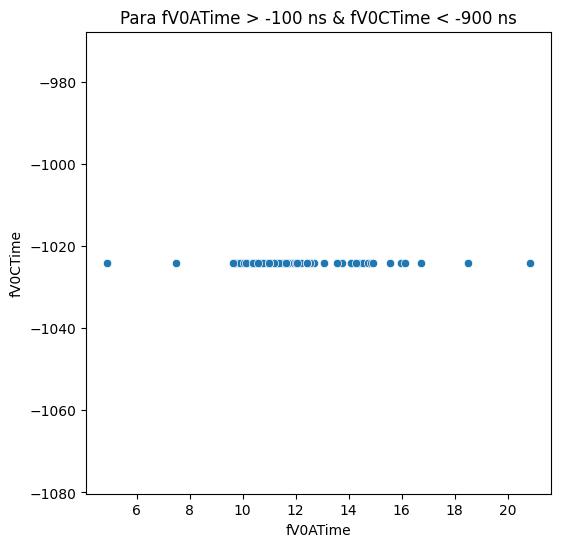

In [17]:
fig, axes = plt.subplots( figsize=(6, 6))
# Plot on the second subplot
sn.scatterplot(data=df_V0Time_rdown, x='fV0ATime', y='fV0CTime')
axes.set_title('Para fV0ATime > -100 ns & fV0CTime < -900 ns')
#fig.savefig("scatterplot_rdown.png") 
plt.show()

##### Elaboración del dataframe final 

In [135]:
#si se necesita remplazar la bandera de -1024.000000 por 0 
df_timeV0 = pd.read_csv('Data/df_fV0Time.csv')
df_timeV0.replace(-1024.000000, 0, inplace=True)

df_timeAD = pd.read_csv('Data/df_fADTime.csv')
df_timeAD.replace(-1024.000000, 0, inplace=True)

In [7]:
df_timeV0 = pd.read_csv('Data/df_fV0Time.csv')
#df_timeV0.replace(-1024.000000, 0, inplace=True)
df_timeAD = pd.read_csv('Data/df_fADTime.csv')
#df_timeAD.replace(-1024.000000, 0, inplace=True)

df_timeV0["Promedio"] = df_timeV0.iloc[:, :].mean(axis = 1)
df_timeAD["Promedio"] = df_timeAD.iloc[:, :].mean(axis = 1)

df_Time = pd.DataFrame()

#new_df['multy'] =pd.DataFrame(multy_array)
#new_df['time'] =pd.DataFrame(time_array)
df_Time['Time V0'] = df_timeV0[['Promedio']].copy()
df_Time['Time AD'] = df_timeAD[['Promedio']].copy()
#df_Time.to_csv('Data/df_TimeV0yCD_mean.csv', index=False)
#df_Time

In [14]:
df_Time = pd.read_csv('Data/df_TimeV0yCD_mean.csv')
df_Time

,Time V0,Time AD
0,-1024.000000,-1024.000000
1,-1024.000000,-1024.000000
2,-1024.000000,-1024.000000
3,-1024.000000,-1024.000000
4,-1024.000000,-1024.000000
...,...,...
4736,-606.124788,-479.361217
4737,-461.136596,60.834987
4738,-621.130441,61.429167
4739,-9.253727,60.618392


In [17]:
df_V0yAD = pd.concat([df_result, df_Time], axis = 1)
#df_V0yAD.to_csv('Data/df_V0yAD.csv', index=False)

In [10]:
#df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) & (df_V0yAD['fADADecision'] == 1)]
#df_V0yAD = df_V0yAD[(df_V0yAD['fADADecision'] == 1)]
#df_V0yAD.to_csv('Data/df_V0yAD.csv', index=False)

### Cálculo de los parametros a analizar del tiempo

In [12]:
df_V0yAD = pd.read_csv('Data/df_V0yAD.csv')
#df_V0yAD

In [6]:
df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) ]
#df_V0yAD

#### Rango (0,2)

In [20]:
df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) & (df_V0yAD['fADADecision'] == 1) & (df_V0yAD['fADCDecision'] == 1)]
df_V0yAD_02 = df_V0yAD[(df_V0yAD['Multiplicity V0'] > 0) & (df_V0yAD['Multiplicity V0'] < 2)]

In [6]:
#df_V0yAD_02 

##### ADATime - V0ATime

In [21]:
# Calculate the difference between the two columns                                          #Condición a cambiar
#df_result_V0_1 = df_result[(df_result['Multiplicity V0'] > 0) & (df_result['Multiplicity V0'] < 2)]
#Resta de los valores indicados
df_V0yAD_02['ADATime - V0ATime'] = df_V0yAD_02['fADATime'] - df_V0yAD_02['fV0ATime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\3527260020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_02['ADATime - V0ATime'] = df_V0yAD_02['fADATime'] - df_V0yAD_02['fV0ATime']


45.8179897635621   0.5883439903931117


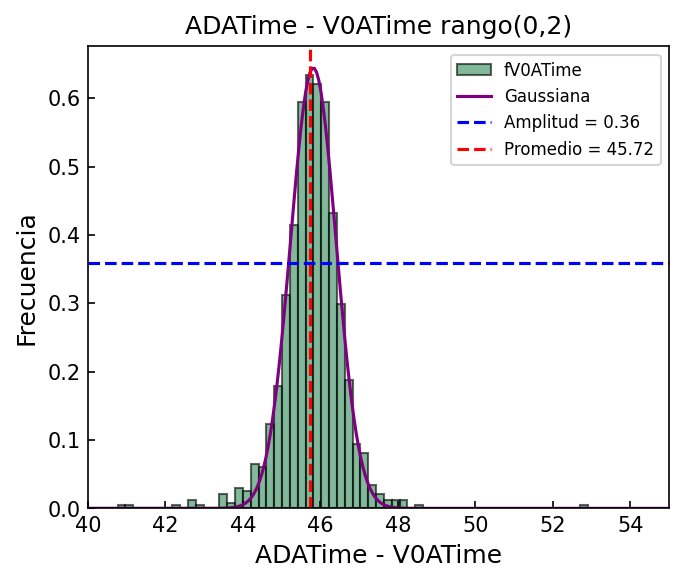

In [85]:
data_to_plot = df_V0yAD_02['ADATime - V0ATime']

#trazar histograma
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 100, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)

plt.xlim([40,55]) #Cambiar según la escala
plt.title('ADATime - V0ATime rango(0,2)') 
plt.xlabel('ADATime - V0ATime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
#plt.title("TrackMate Info", fontsize = 12)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# Función gaussiana de ajuste
#Primero se define la función a ajustar
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))
    

#Calcular el centro del bin para usarlo como datos y para ajustar
bins = (bins[:-1] + np.diff(bins) / 2)

#Crear un eje x arbitrario para ajustar
x_values_to_fit = np.linspace(38,55,300) #Cambiar dependiendo de la escala para gaussiano 

# Ajuste los datos y grafique el resultado
# p0 es la estimación inicial de los coeficientes de ajuste (A, mu y sigma arriba)
param, cov = curve_fit(gaussian, bins,counts, p0=(46,46.5,0.3)) #Cambiar dependiendo de la escala 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# parámetros de ajuste 
amp_gaus  = param[0] #amplitud
mean_gaus = param[1] #media de la distribución gaussiana
std_gau   = param[2] #desviación estándar de la distribución

# Calcular la media y la desviación estándar
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

# Calcular la amplitud de la curva gaussiana
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Crear un histograma para aproximar la curva gaussiana
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Graficar el histograma (aproximación gaussiana)

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')

plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2)

print(mean_gaus,' ', std_gau)
#Guardar figura
#plt.savefig('Resultados/Tiempo/ADATime-V0ATime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

##### ADCTime - V0CTime

In [27]:
#df_result_V0_1 = df_result[(df_result['Multiplicity V0'] > 0) & (df_result['Multiplicity V0'] < 2)]
#Resta de los valores indicados
df_V0yAD_02['ADCTime - V0CTime'] = df_V0yAD_02['fADCTime'] - df_V0yAD_02['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\467145280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_02['ADCTime - V0CTime'] = df_V0yAD_02['fADCTime'] - df_V0yAD_02['fV0CTime']


62.16504320258593   0.29837246700532427


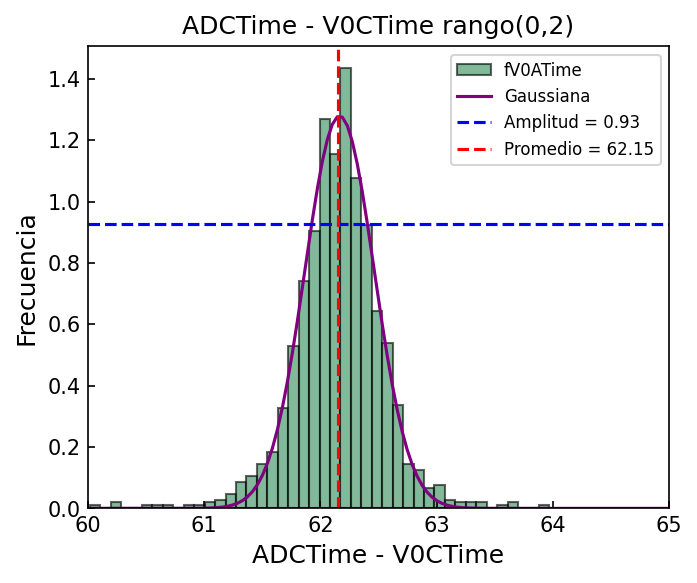

In [111]:
data_to_plot = df_V0yAD_02['ADCTime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 100, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([60,65]) #Change dependig the scale 
plt.title('ADCTime - V0CTime rango(0,2)') 
plt.xlabel('ADCTime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(40,70,700) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(62,62.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()
###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)


# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')

plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADCTime-V0CTime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

##### ADATime - ADCTime

In [21]:
df_V0yAD_02['ADATime - ADCTime'] = df_V0yAD_02['fADATime'] - df_V0yAD_02['fADCTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_29600\1759687642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_02['ADATime - ADCTime'] = df_V0yAD_02['fADATime'] - df_V0yAD_02['fADCTime']


In [24]:
df_V0yAD_02['ADCTime - ADATime'] = df_V0yAD_02['fADCTime'] - df_V0yAD_02['fADATime'] 

C:\Users\Asus\AppData\Local\Temp\ipykernel_29600\512899225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_02['ADCTime - ADATime'] = df_V0yAD_02['fADCTime'] - df_V0yAD_02['fADATime']


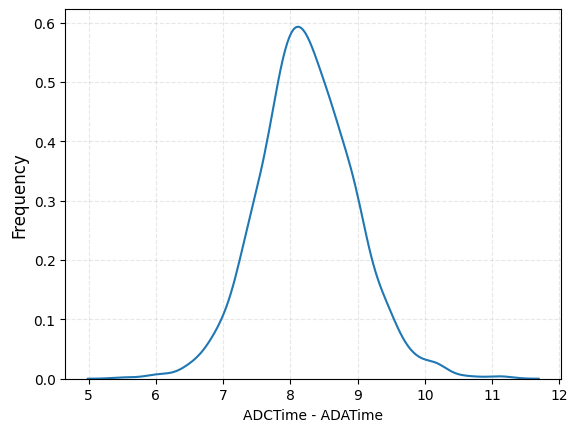

In [25]:
sn.kdeplot(data = df_V0yAD_02['ADCTime - ADATime']) 
#plt.xlabel("fV0ATime", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")   
plt.show()

8.216028268926205   0.6574389451354556


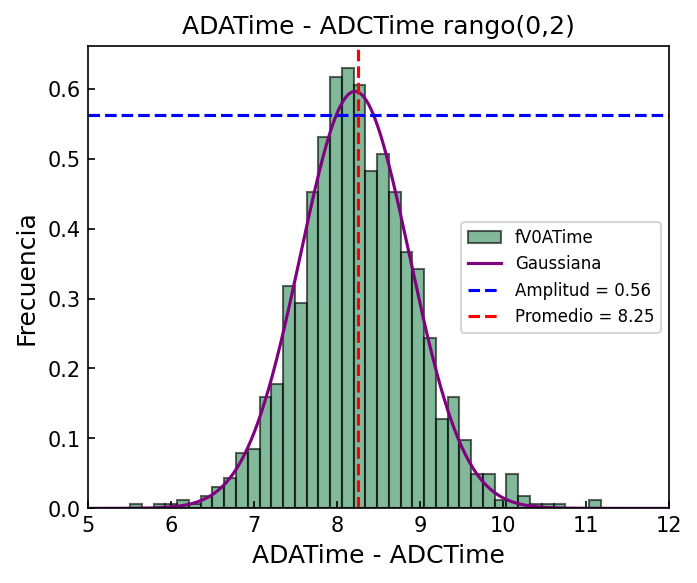

In [26]:
data_to_plot = df_V0yAD_02['ADCTime - ADATime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 40, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([5,12]) #Change dependig the scale 
plt.title('ADATime - ADCTime rango(0,2)') 
plt.xlabel('ADATime - ADCTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(5,12,500) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(8,8.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')

plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #

#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-ADCTime_ResolTim_(0-2)_FWHM.png', transparent=False, bbox_inches = 'tight')

-8.216028768333814   0.6574397361608008


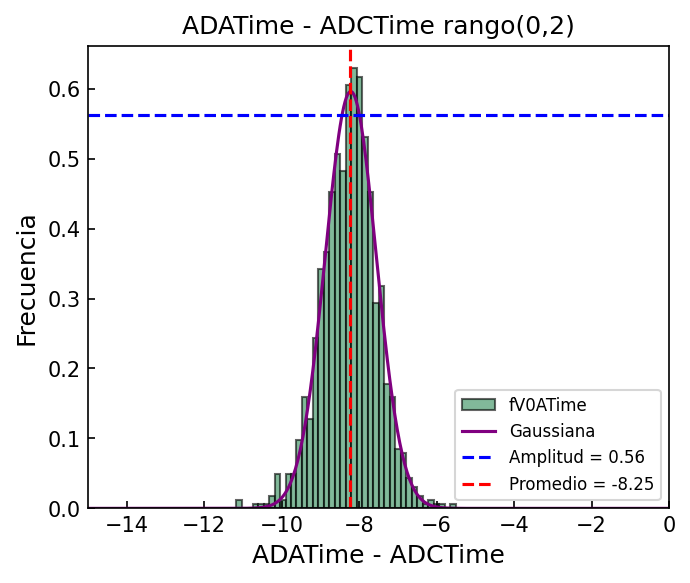

In [112]:
data_to_plot = df_V0yAD_02['ADATime - ADCTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 40, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([-15,0]) #Change dependig the scale 
plt.title('ADATime - ADCTime rango(0,2)') 
plt.xlabel('ADATime - ADCTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-15,1,500) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(-9,-8,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')

plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #

#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-ADCTime_ResolTim_(0-2)_FWHM.png', transparent=False, bbox_inches = 'tight')

##### V0ATime - V0CTime

In [33]:
df_V0yAD_02['V0ATime - V0CTime'] = df_V0yAD_02['fV0ATime'] - df_V0yAD_02['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\4278981865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_02['V0ATime - V0CTime'] = df_V0yAD_02['fV0ATime'] - df_V0yAD_02['fV0CTime']


8.12833672609065   0.555313029141102


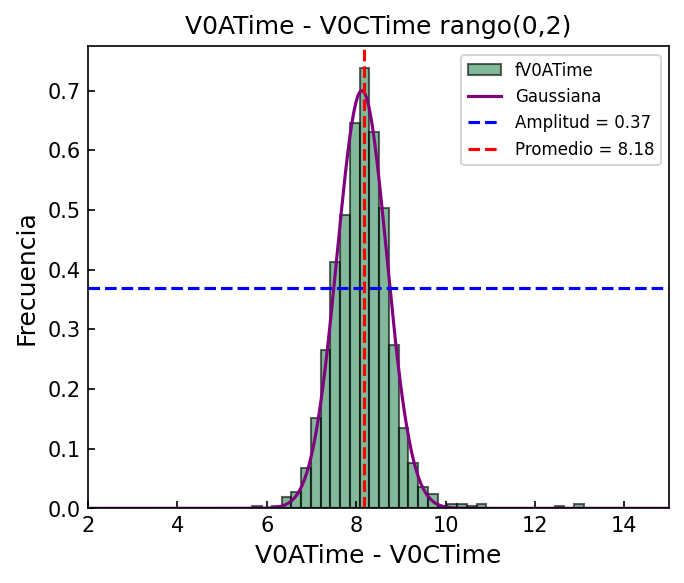

In [113]:
data_to_plot = df_V0yAD_02['V0ATime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 100, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([2,15]) #Change dependig the scale 
plt.title('V0ATime - V0CTime rango(0,2)') 
plt.xlabel('V0ATime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
#plt.title("TrackMate Info", fontsize = 12)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(2,15,500) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(8,8.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')

plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #

#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/V0ATime-V0CTime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

#### Rango (2,4)

In [117]:
df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) & (df_V0yAD['fADADecision'] == 1) & (df_V0yAD['fADCDecision'] == 1)]
df_V0yAD_24 = df_V0yAD[(df_V0yAD['Multiplicity V0'] > 2) & (df_V0yAD['Multiplicity V0'] < 4)]

In [118]:
#df_V0yAD_24

##### ADATime - V0ATime

In [119]:
df_V0yAD_24['ADATime - V0ATime'] = df_V0yAD_24['fADATime'] - df_V0yAD_24['fV0ATime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\3568867719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_24['ADATime - V0ATime'] = df_V0yAD_24['fADATime'] - df_V0yAD_24['fV0ATime']


45.754978268773556   0.4909430744244414


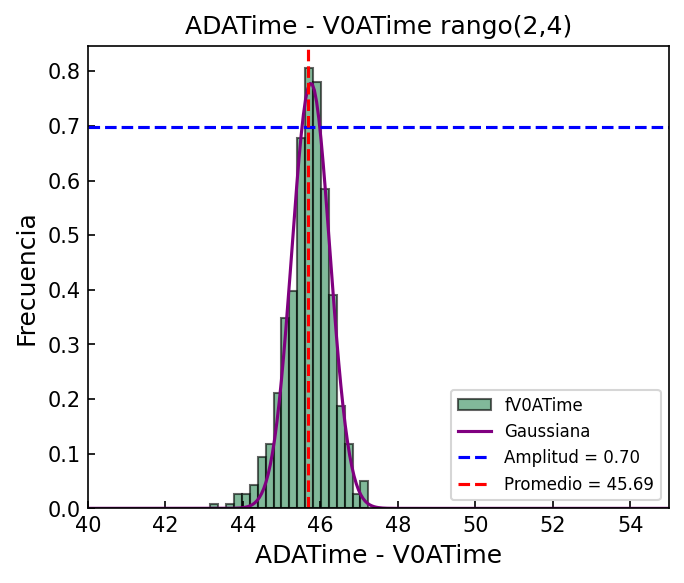

In [120]:
data_to_plot = df_V0yAD_24['ADATime - V0ATime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 20, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([40,55]) #Change dependig the scale 
plt.title('ADATime - V0ATime rango(2,4)') 
plt.xlabel('ADATime - V0ATime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(38,55,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(46,46.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-V0ATime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

##### ADCTime - V0CTime

In [122]:
df_V0yAD_24['ADCTime - V0CTime'] = df_V0yAD_24['fADCTime'] - df_V0yAD_24['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\2742996315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_24['ADCTime - V0CTime'] = df_V0yAD_24['fADCTime'] - df_V0yAD_24['fV0CTime']


62.144133813933664   0.20862463380161192


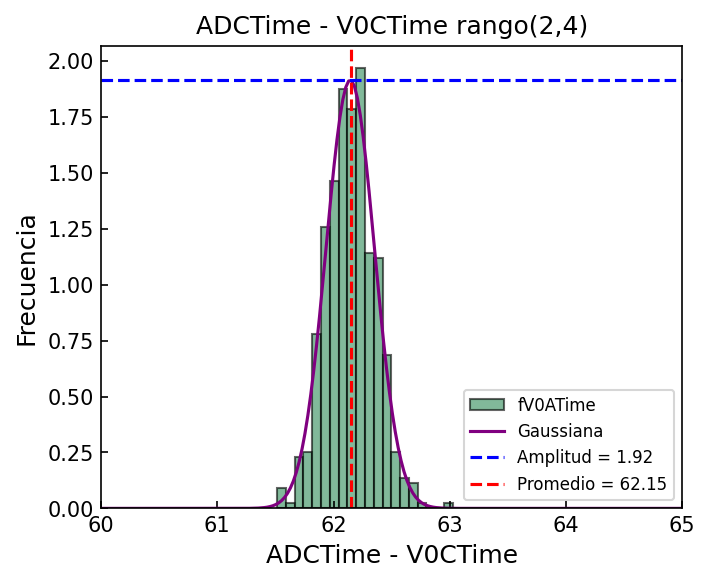

In [127]:
data_to_plot = df_V0yAD_24['ADCTime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 20, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([60,65]) #Change dependig the scale 
plt.title('ADCTime - V0CTime rango(2,4)') 
plt.xlabel('ADCTime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit =  np.linspace(60,70,400) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(62,62.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-V0ATime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

##### ADATime - ADCTime

In [125]:
df_V0yAD_24['ADATime - ADCTime'] = df_V0yAD_24['fADATime'] - df_V0yAD_24['fADCTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\2767746026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_24['ADATime - ADCTime'] = df_V0yAD_24['fADATime'] - df_V0yAD_24['fADCTime']


-8.244691831901704   0.6158612330975356


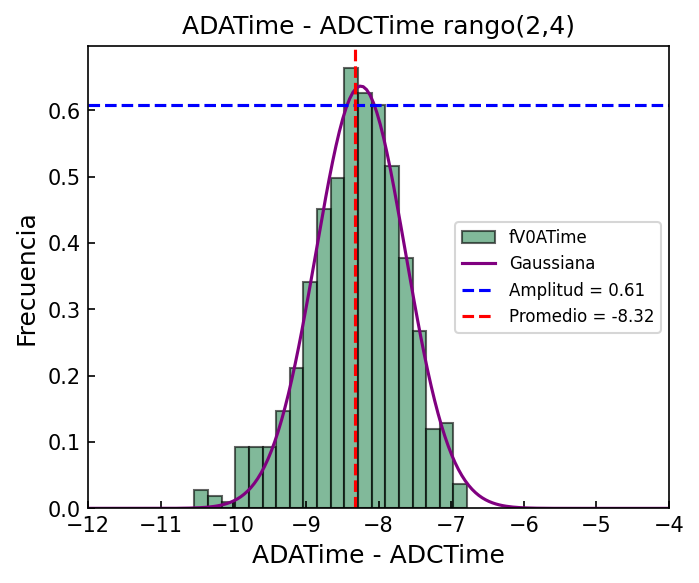

In [129]:
data_to_plot = df_V0yAD_24['ADATime - ADCTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 20, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([-12,-4]) #Change dependig the scale 
plt.title('ADATime - ADCTime rango(2,4)') 
plt.xlabel('ADATime - ADCTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-15,-1,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(-9,-8.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-V0ATime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

##### V0ATime - V0CTime

In [131]:
df_V0yAD_24['V0ATime - V0CTime'] = df_V0yAD_24['fV0ATime'] - df_V0yAD_24['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\4122369046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_24['V0ATime - V0CTime'] = df_V0yAD_24['fV0ATime'] - df_V0yAD_24['fV0CTime']


8.148743313795597   0.4221542148764294


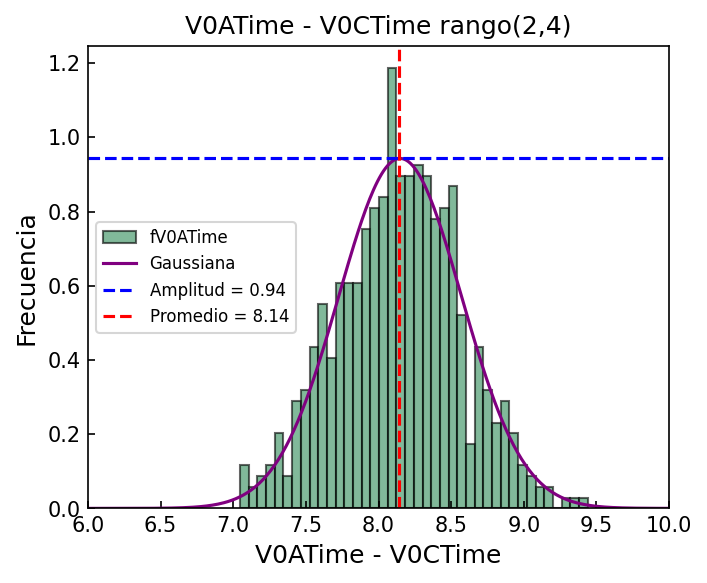

In [132]:
data_to_plot = df_V0yAD_24['V0ATime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 40, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([6,10]) #Change dependig the scale 
plt.title('V0ATime - V0CTime rango(2,4)') 
plt.xlabel('V0ATime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(6,10,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(8,8.5,0.3)) #Change dependig the scale  
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-V0ATime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

#### Rango (4,6)

In [133]:
df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) & (df_V0yAD['fADADecision'] == 1) & (df_V0yAD['fADCDecision'] == 1)]
df_V0yAD_46 = df_V0yAD[(df_V0yAD['Multiplicity V0'] > 4) & (df_V0yAD['Multiplicity V0'] < 6)]

In [116]:
#df_V0yAD_46

##### ADATime - V0ATime

In [135]:
df_V0yAD_46['ADATime - V0ATime'] = df_V0yAD_46['fADATime'] - df_V0yAD_46['fV0ATime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\347475215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_46['ADATime - V0ATime'] = df_V0yAD_46['fADATime'] - df_V0yAD_46['fV0ATime']


45.74767209241896   0.5034719458761517


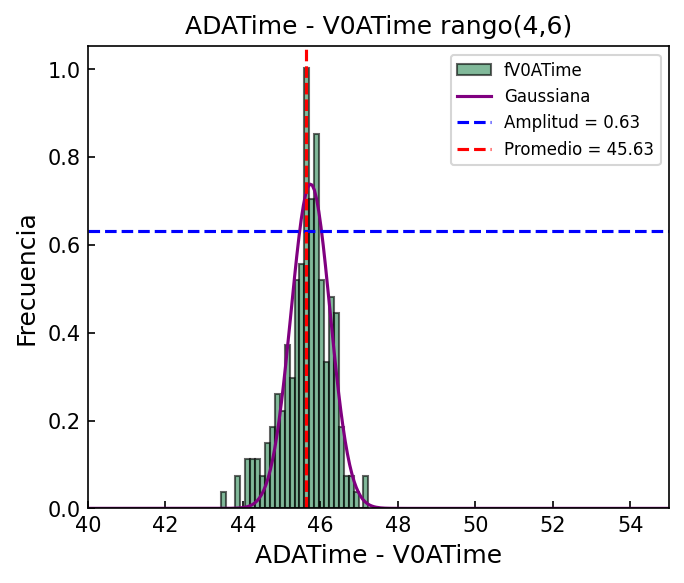

In [136]:
data_to_plot = df_V0yAD_46['ADATime - V0ATime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 30, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([40,55]) #Change dependig the scale 
plt.title('ADATime - V0ATime rango(4,6)') 
plt.xlabel('ADATime - V0ATime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(38,55,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(46,46.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2)  #
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-V0ATime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

##### ADCTime - V0CTime

In [137]:
df_V0yAD_46['ADCTime - V0CTime'] = df_V0yAD_46['fADCTime'] - df_V0yAD_46['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\243420438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_46['ADCTime - V0CTime'] = df_V0yAD_46['fADCTime'] - df_V0yAD_46['fV0CTime']


62.16350625606386   0.17429229543540395


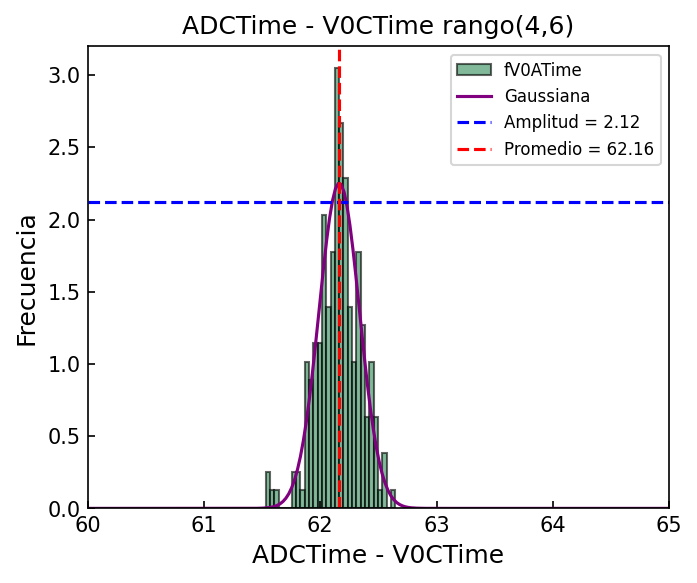

In [138]:
data_to_plot = df_V0yAD_46['ADCTime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 30, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([60,65]) #Change dependig the scale 
plt.title('ADCTime - V0CTime rango(4,6)') 
plt.xlabel('ADCTime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(60,70,400) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(62,62.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-V0ATime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

##### ADATime - ADCTime

In [139]:
df_V0yAD_46['ADATime - ADCTime'] = df_V0yAD_46['fADATime'] - df_V0yAD_46['fADCTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\1828731789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_46['ADATime - ADCTime'] = df_V0yAD_46['fADATime'] - df_V0yAD_46['fADCTime']


-8.349435718195867   0.6547983555477598


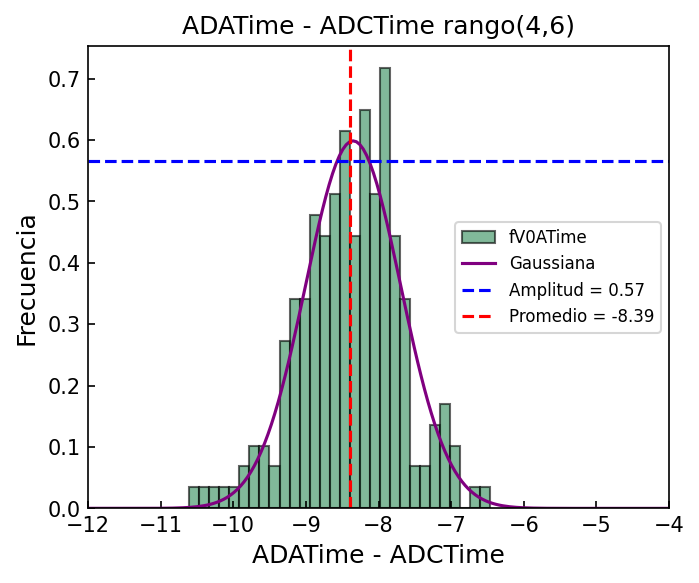

In [141]:
data_to_plot = df_V0yAD_46['ADATime - ADCTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 30, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([-12,-4]) #Change dependig the scale 
plt.title('ADATime - ADCTime rango(4,6)') 
plt.xlabel('ADATime - ADCTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-15,-1,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(-9,-8.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) #
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-V0ATime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

##### V0ATime - V0CTime

In [142]:
df_V0yAD_46['V0ATime - V0CTime'] = df_V0yAD_46['fV0ATime'] - df_V0yAD_46['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6356\4058569591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_46['V0ATime - V0CTime'] = df_V0yAD_46['fV0ATime'] - df_V0yAD_46['fV0CTime']


8.069083831127738   0.35882386733938704


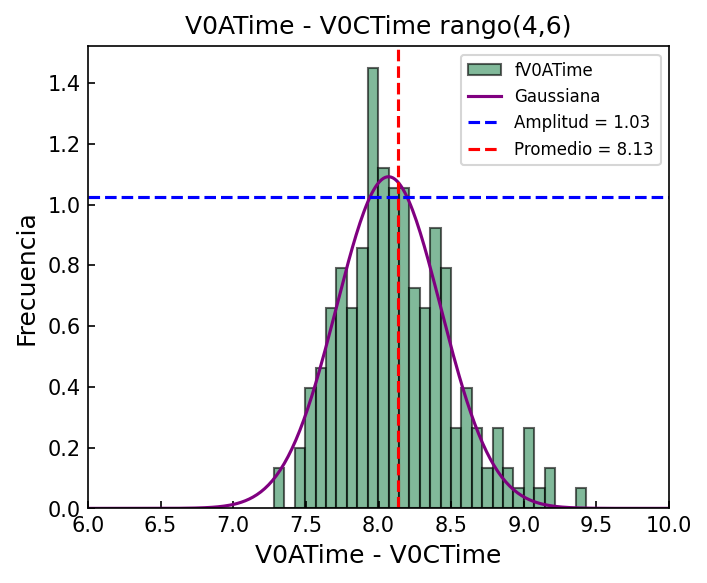

In [144]:
data_to_plot = df_V0yAD_46['V0ATime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 30, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([6,10]) #Change dependig the scale  
plt.title('V0ATime - V0CTime rango(4,6)') 
plt.xlabel('V0ATime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(6,10,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(8,8.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2)
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/ADATime-V0ATime_ResolTim_(0-2).png', transparent=False, bbox_inches = 'tight')

### Tiempo V0

In [102]:
df_timeV0 = pd.read_csv('Data/df_fV0Time.csv')
#df_timeV0

In [103]:
df_timeV0["Suma"] = df_timeV0.iloc[:, :].sum(axis = 1)
df_timeV0["Promedio"] = df_timeV0.iloc[:, :].mean(axis = 1)
df_timeV0

,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,...,val_56,val_57,val_58,val_59,val_60,val_61,val_62,val_63,Suma,Promedio
0,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
1,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
2,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
3,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
4,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,2.906271,3.000156,-1024.000000,2.693358,3.435496,-1024.000000,3.759157,3.018283,3.026032,3.012265,...,-1024.000000,11.229528,-1024.000000,-1024.000000,-1024.000000,13.230840,-1024.000000,-1024.000000,-38791.986428,-1193.599582
4737,-1024.000000,2.075265,-1024.000000,1.978009,-1024.000000,3.596260,-1024.000000,-1024.000000,1.880489,2.716903,...,-1024.000000,-1024.000000,-1024.000000,9.891880,10.596437,-1024.000000,9.196608,12.185239,-29512.742142,-908.084374
4738,4.234684,-1024.000000,-1024.000000,-1024.000000,3.035445,2.534101,2.302003,-1024.000000,-1024.000000,2.663597,...,10.544925,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-39752.348251,-1223.149177
4739,6.582262,2.350375,2.538524,3.092256,2.915774,3.148078,2.720357,3.095087,2.949539,2.597858,...,11.463334,11.869370,10.105138,10.027761,12.958988,10.427899,10.681471,10.297821,-592.238505,-18.222723


In [104]:
df_timeV0 = pd.read_csv('Data/df_fADTime.csv')
timeV0_array= df_timeV0.to_numpy().reshape(-1,1)
timeV0_array

array([[-1024.],
       [-1024.],
       [-1024.],
       ...,
       [-1024.],
       [-1024.],
       [-1024.]])

In [105]:
timeV0_array.shape

(75856, 1)